<a href="https://colab.research.google.com/github/thison12/phase2/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial DataFrame shape: (201, 6)
         Date    Open    High     Low     Cls  Volume
0  2024-01-01  129.66  133.97  125.17  130.58    4015
1  2024-01-02  161.87  167.03  155.56  157.36    9241
2  2024-01-03  148.60  156.97  142.22  154.84   17884
3  2024-01-04  138.68  142.55  132.78  135.50   18814
4  2024-01-05  153.94  157.17  148.90  149.65    8166
Cleaned DataFrame shape: (198, 6)

📊 Linear Regression Evaluation:
MAE: 7.447514619262843
RMSE: 44.743083847954296
R2 Score: -2040.63449461884

📊 Random Forest Evaluation:
MAE: 0.1096505270107092
RMSE: 0.1447553447480265
R2 Score: 0.9786304496988535


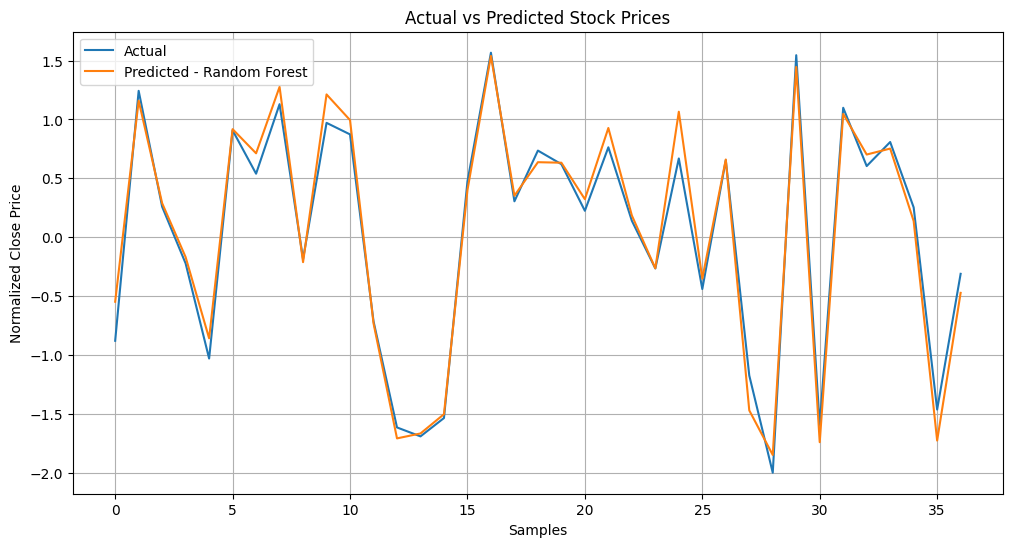

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3311
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1254
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0900
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0792
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0759
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0802
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0763
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0731
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0746
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


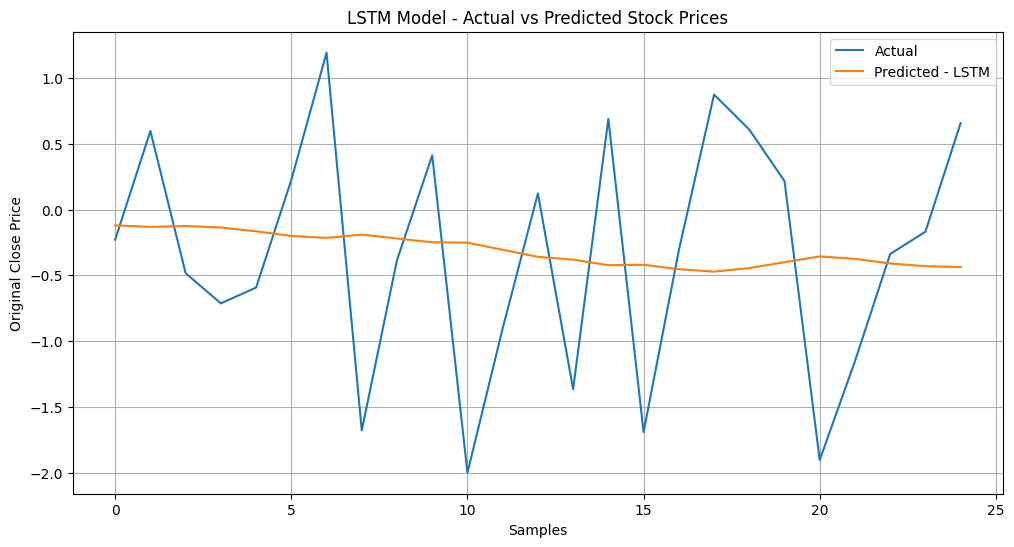

In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# STEP 2: Load Dataset
df = pd.read_csv("/content/ai_stock_data.csv")  # Updated path
print("Initial DataFrame shape:", df.shape)
print(df.head())

# STEP 3: Data Preprocessing
# Convert 'Date' column if exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()
print("Cleaned DataFrame shape:", df.shape)

# STEP 4: Feature Normalization (Standard Scaler)
features = ['Open', 'High', 'Low', 'Cls', 'Volume']  # Use 'Cls' for Close price
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# STEP 5: Feature Engineering
df['MA_5'] = df['Cls'].rolling(window=5).mean()
df['MA_10'] = df['Cls'].rolling(window=10).mean()
df['RSI'] = df['Cls'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean()

df = df.dropna()

# STEP 6: Train-Test Split
X = df[['Open', 'High', 'Low', 'Volume', 'MA_5', 'MA_10', 'RSI']]
y = df['Cls']  # Use 'Cls' for Close price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# STEP 8: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# STEP 9: Model Evaluation
def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

# STEP 10: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_rf, label='Predicted - Random Forest')
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Samples")
plt.ylabel("Normalized Close Price")
plt.grid(True)
plt.show()

# OPTIONAL STEP 11: LSTM Model (Univariate for 'Close' Price)

#  Prepare data for LSTM
df_lstm = df[['Cls']]  # Use 'Cls' for Close price
scaler_lstm = MinMaxScaler()
df_lstm_scaled = scaler_lstm.fit_transform(df_lstm)

X_seq, y_seq = [], []
window = 60

for i in range(window, len(df_lstm_scaled)):
    X_seq.append(df_lstm_scaled[i-window:i, 0])
    y_seq.append(df_lstm_scaled[i, 0])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

# Split into train/test
split_index = int(len(X_seq) * 0.8)
X_train_lstm, X_test_lstm = X_seq[:split_index], X_seq[split_index:]
y_train_lstm, y_test_lstm = y_seq[:split_index], y_seq[split_index:]

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_seq.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)

# Predict and Evaluate
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = scaler_lstm.inverse_transform(y_pred_lstm.reshape(-1, 1))
y_test_lstm_orig = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1))

# Plot LSTM Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_lstm_orig, label='Actual')
plt.plot(y_pred_lstm, label='Predicted - LSTM')
plt.title("LSTM Model - Actual vs Predicted Stock Prices")
plt.xlabel("Samples")
plt.ylabel("Original Close Price")
plt.legend()
plt.grid(True)
plt.show()